# Look at the real NN

In [41]:
import os
from pathlib import Path
import numpy as np 
from scipy.io import loadmat 
import matplotlib.pyplot as plt
import pandas as pd
import deepdish as dd
import connectivity.constants as const
import connectivity.data as data
import connectivity.model as model
import connectivity.run as run
import SUITPy as suit
import surfAnalysisPy as surf

In [42]:
# Load an example design matrix with instruction and condition regressors
d = const.base_dir
d

PosixPath('/Volumes/diedrichsen_data$/data/super_cerebellum')

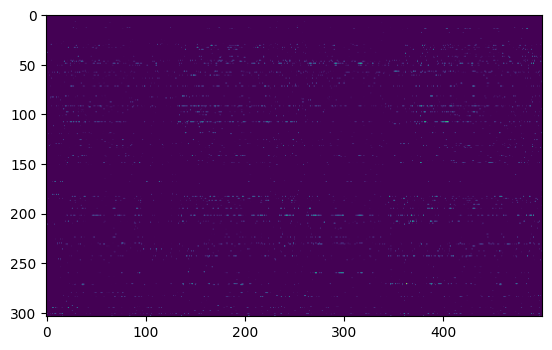

In [44]:
file = os.path.join(const.base_dir,'sc1','conn_models','train','NN_tessels0162_A0','NN_tessels0162_A0_s03.h5')
M=dd.io.load(file)
plt.imshow(M.coef_[:500,:].T)
plt.show()

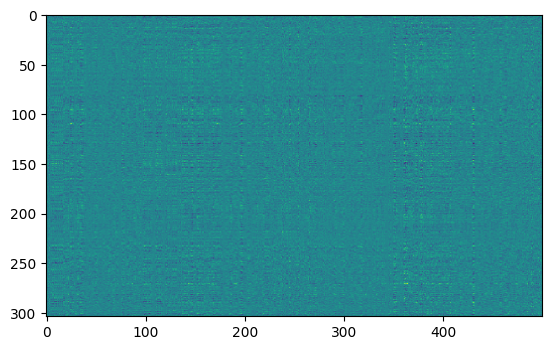

In [37]:
file = os.path.join(const.base_dir,'sc1','conn_models','train','ridge_tessels0162_A0','ridge_tessels0162_A0_s03.h5')
M=dd.io.load(file)
plt.imshow(M.coef_[:500,:].T)
plt.show()

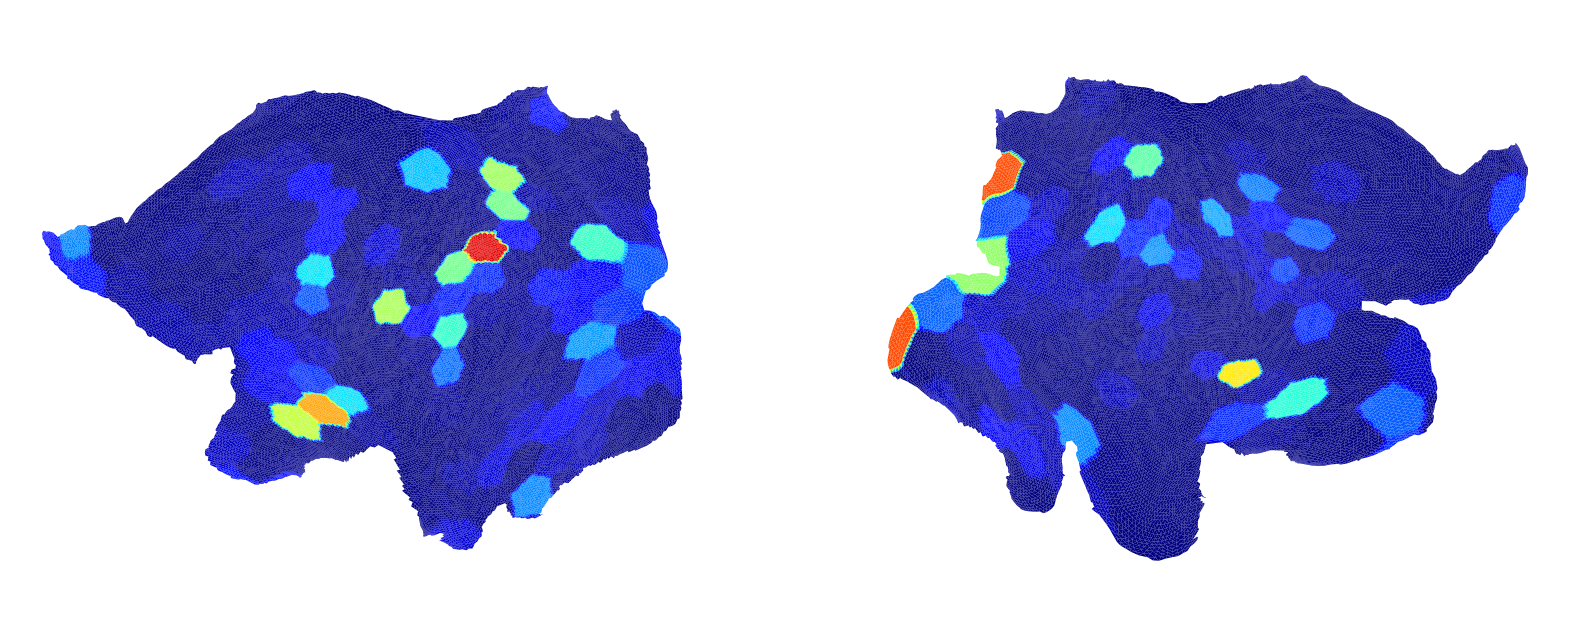

In [50]:
file = os.path.join(const.base_dir,'sc1','conn_models','train','NN_tessels0162_A0','NN_tessels0162_A0_s03.h5')
M=dd.io.load(file)
avrgW = M.coef_.mean(axis=0)
# Map the data to surface
gii_func,_ = data.convert_cortex_to_gifti(avrgW,'tessels0162')
flat=[]
roi_dir = os.path.join(const.base_dir,'sc1','RegionOfInterest','data','group')
flat.append(os.path.join(roi_dir,'fs_LR.32k.L.flat.surf.gii'))
flat.append(os.path.join(roi_dir,'fs_LR.32k.R.flat.surf.gii'))

fig = plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
surf.plot.plotmap(gii_func[0],flat[0],cscale = [0,0.02])
plt.subplot(1,2,2)
surf.plot.plotmap(gii_func[1],flat[1],cscale = [0,0.02])
plt.show()

In [49]:
avrgW.max()

0.01825223393400536

R beta weighted:[0.256 0.329 0.334 0.442 0.498]


R timeseries:   [0.059 0.107 0.111 0.178 0.205]
R beta w  mean: [-0.251  0.11  -0.12   0.229 -0.199]
R beta wo mean: [0.005 0.001 0.025 0.127 0.107]
R beta weighted:[0.059 0.107 0.111 0.178 0.205]


## Extension to considering only a few regressors / conditions
Interestingly, this approach also generalizes relatively elegantly to evaluating (or training) the the model on a subset of the conditions / regressors. For this, the Dataset class has a input argument ``subset``, which does restrict the regression coefficients and weighting to a specific set of conditions. That is, the restricted and weighted set of regression coefficients are equivalent to (in the sense of the above) the mean-centered predicted time series of a run which only includes the included condition / phases/ instructions.    

Note that because of the covariance between regressors, and how they interact in producing the predicted time series, X1 is not simply a subset of X - so we should use Dataset.get_data to get subsets of the data. 